In [4]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn.preprocessing as prep
# currently (03/2019) scaleogram needs install via https://github.com/alsauve/scaleogram
# because an old PyWavelets (0.5.2) is installend and PyWavelets > 1.0 is needed
import scaleogram as scg 
import pywt
from hmmlearn import hmm


# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

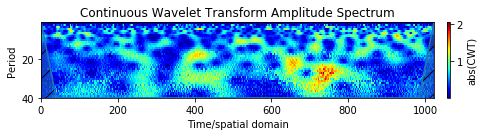

In [9]:
ns = 1024
time = np.arange(ns)
noise = np.random.randn(ns)
scales = scg.periods2scales( np.arange(1, 40) )


# and the scaleogram of noise
scg.cws(noise, scales=scales, figsize=(7,2))
plt.tight_layout()

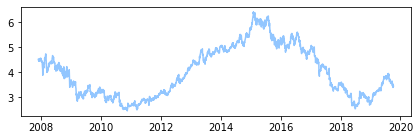

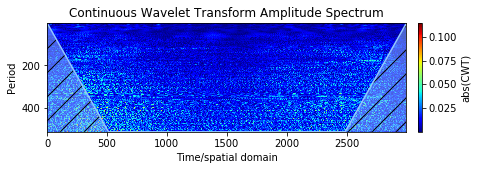

In [16]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle", "rb" ) )
close = data.xs('CLOSE', axis = 1, level = 1)
close = close['TLS.AX'].dropna()
pct = close.pct_change().dropna()
scales = scg.periods2scales( np.arange(1, 512))

fig1, ax1 = plt.subplots(1, 1, figsize=(7,2));
ax1.plot(close)
ax2 = scg.cws(pct.values, scales=scales, figsize=(7,2))


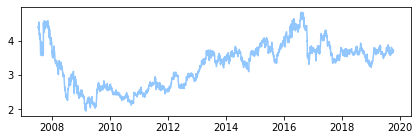

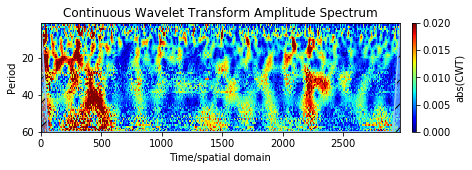

In [17]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle", "rb" ) )
close = data.xs('CLOSE', axis = 1, level = 1)
close = close['SKC.AX'].dropna()
pct = close.pct_change().dropna()
scales = scg.periods2scales( np.arange(1, 60) )

fig1, ax1 = plt.subplots(1, 1, figsize=(7,2));
ax1.plot(close)
ax2 = scg.cws(pct.values-pct.mean(), scales=scales, figsize=(7,2),clim=(0,0.02))

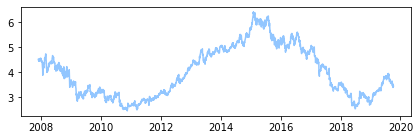

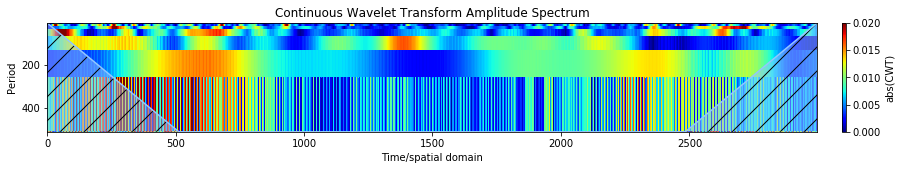

In [30]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle", "rb" ) )
close = data.xs('CLOSE', axis = 1, level = 1)
close = close['TLS.AX'].dropna()
pct = close.pct_change().rolling(3).mean().dropna()
# scales = scg.periods2scales( np.arange(1, 512,) )
scales = scg.periods2scales( np.array([2**i for i in range(10)]))

fig1, ax1 = plt.subplots(1, 1, figsize=(7,2));
ax1.plot(close)
ax2 = scg.cws(pct.values-pct.mean(), scales=scales, figsize=(15,2),clim=(0,0.02))

In [26]:
[2**i for i in range(10)]

array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153,
       157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205,
       209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257,
       261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309,
       313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361,
       365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413,
       417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465,
       469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509])

In [58]:
dir(method_list[1])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

TypeError: object of type 'Line2D' has no len()

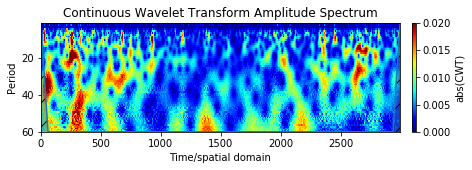

In [56]:
len(scg.cws(pct.values-pct.mean(), scales=scales, figsize=(7,2),clim=(0,0.02)))

AttributeError: 'AxesSubplot' object has no attribute 'coefs'

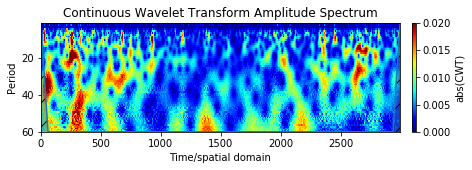

In [59]:
scg.cws(pct.values-pct.mean(), scales=scales, figsize=(7,2),clim=(0,0.02)).coefs

In [6]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle", "rb" ) )
close = data.xs('CLOSE', axis = 1, level = 1)

In [7]:
selectedData = close[[column for column in close.columns if (len(close[column].dropna())>int(7546/3) and not np.isnan(close[column][-1]))]].ffill().dropna()

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

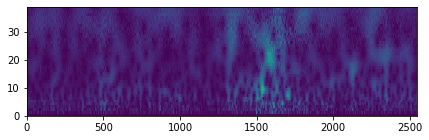

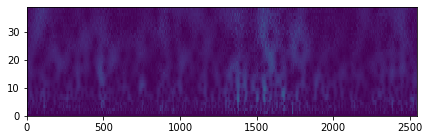

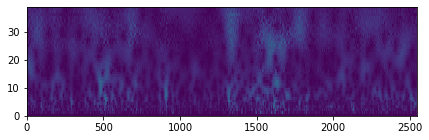

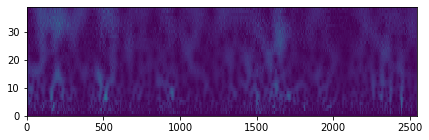

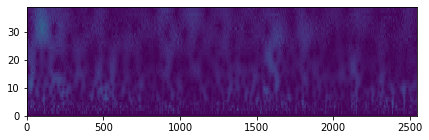

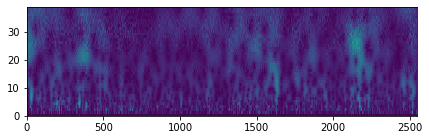

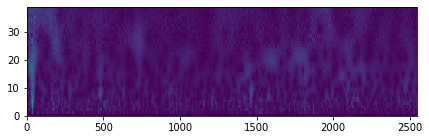

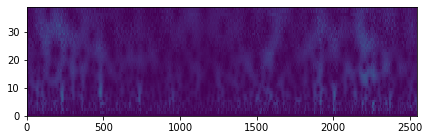

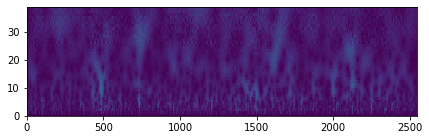

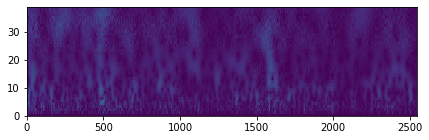

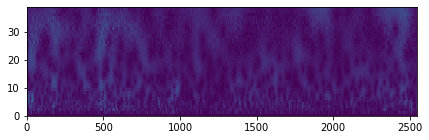

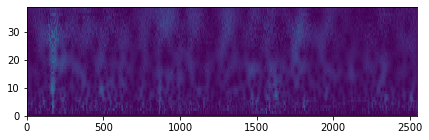

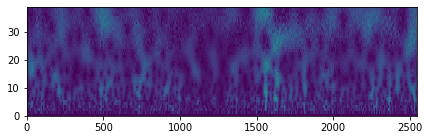

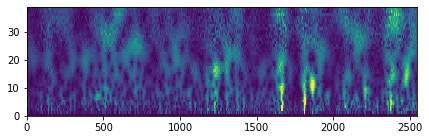

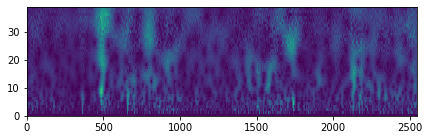

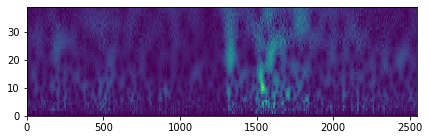

In [ ]:
X = None
for stock in selectedData.columns[:50]:
    close = selectedData[stock].dropna()
    pct = close.pct_change().dropna()
    fig, ax = plt.subplots(figsize=(7,2))
    maxScale = 40
    maxPower = 0.1
    specto = scg.CWT(pct.values-pct.mean(), scales=scg.periods2scales( np.arange(1, maxScale) ))
    values = abs(specto.coefs)
    qmesh = ax.pcolormesh(abs(values))
    qmesh.set_clim(*(0,maxPower))
    
    scaler  = prep.StandardScaler()
    scaler.fit(values.T)
    X_temp = scaler.transform(values.T)
    
    if X is None: 
        X = X_temp
    else:
        X = np.concatenate((X,X_temp))
    


In [21]:
n_components = 4
remodel = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000)
remodel.startprob =  np.random.dirichlet(np.ones(n_components),size=1)
remodel.fit(X)


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

2549


NameError: name 'remodel' is not defined

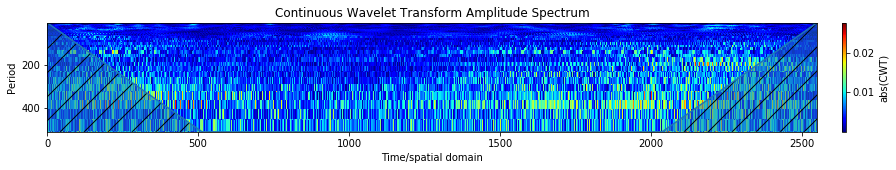

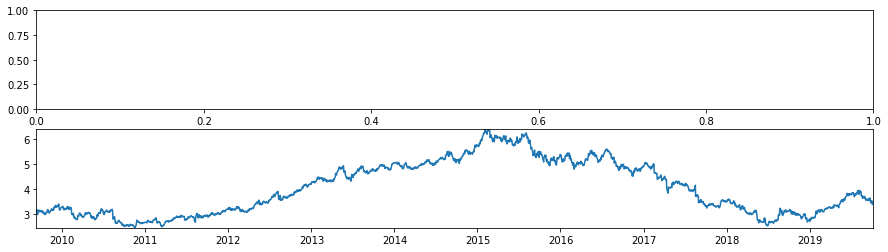

In [53]:
X_TEST = None
for stock in ['TLS.AX']:
    close = selectedData[stock].dropna()
    pct = close.pct_change().dropna()
    logReturns = (np.log10(close)-np.log10(close.shift(1))).dropna()
#     fig, ax = plt.subplots(figsize=(15,6))
    maxScale = 512
    maxPower = 0.03
    print(len(pct))
#     specto = scg.cwt(pct.values-pct.mean())
    scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(512)))
    specto = scg.cws(logReturns.values, scales=scales, figsize=(15,2))
#     scales=scg.periods2scales( np.arange(1, maxScale,10) )
#     scales = scg.periods2scales( np.array([2**i for i in range(10)]) )
    
#     values = abs(specto.coefs)
    
#     scaler  = prep.StandardScaler()
#     scaler.fit(values.T)
#     X_temp = scaler.transform(values.T)
    
    
#     qmesh = ax.pcolormesh(abs(values))
#     qmesh.set_clim(*(0,maxPower))
    fig1, ax= plt.subplots(2, 1, figsize=(15,4))
    ax[1].plot(close)
    plt.autoscale(tight=True)

    ax[0].plot(range(len(values.T)), remodel.predict(X_temp))
    ax[0].set_xticks(range(len(values.T)))
    ax[0].set_autoscalex_on = True
    ax[1].set_autoscalex_on = True
    plt.autoscale(tight=True)


In [22]:
np.array([2**i for i in range(16)])

array([    1,     2,     4,     8,    16,    32,    64,   128,   256,
         512,  1024,  2048,  4096,  8192, 16384, 32768])

In [20]:
len(X_TEST)

558231

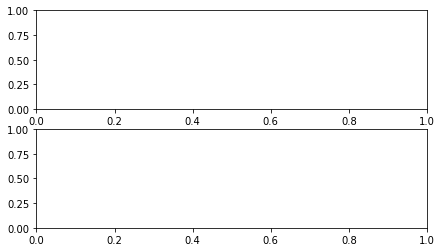

In [28]:
fig1, ax= plt.subplots(2, 1, figsize=(7,4))
ax1.plot()
ax2.plot(remodel.predict(X_TEST))

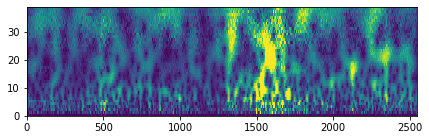

In [34]:
X = None
for stock in selectedData.columns[:50]:
    close = selectedData[stock].dropna()
    pct = close.pct_change().dropna()
    fig, ax = plt.subplots(figsize=(7,2))
    maxScale = 40
    maxPower = 0.03
    specto = scg.CWT(pct.values-pct.mean(), scales=scg.periods2scales( np.arange(1, maxScale) ))
    values = abs(specto.coefs)
    qmesh = ax.pcolormesh(abs(values))
    qmesh.set_clim(*(0,maxPower))
    
    scaler  = prep.StandardScaler()
    scaler.fit(values.T)
    X_temp = scaler.transform(values.T)
    
    
    if X is None: 
        X = X_temp
    else:
        X = np.concatenate((X,X_temp))
    
    break

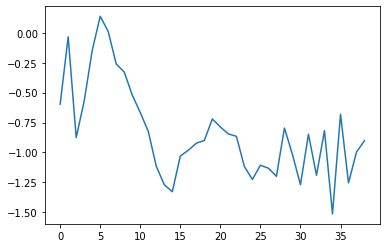

In [35]:
    plt.plot(X_temp)


<IPython.core.display.Javascript object>


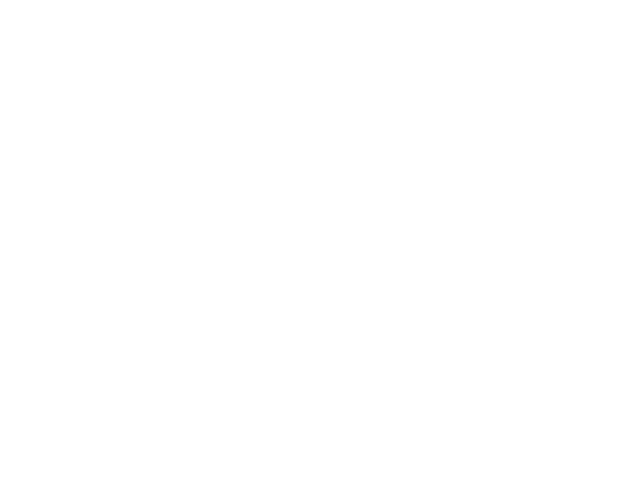

NameError: name 'data_' is not defined

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3

plt.style.use('seaborn-pastel')
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure()
ax = p3.Axes3D(fig)

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 400
# data = np.array(list(gen(N))).T
data = data_
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-0.04,0.04])
ax.set_xlabel('X')

ax.set_ylim3d([-0.04,0.04])
ax.set_ylabel('Y')

ax.set_zlim3d([-0.04,0.04])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

In [1]:
data

NameError: name 'data' is not defined

In [5]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle", "rb" ) )
close = data.xs('CLOSE', axis = 1, level = 1)

In [6]:
data_ = close[['TLS.AX','SKC.AX','ABP.AX']].pct_change().rolling(5).mean().dropna().values.T